### 협업일지
#### 일자 : 2024-11-22 / 박하진

#### 오늘 할 일
-
-
-

#### 오늘 한 일
- 지하철 혼잡도 시각화를 위한 데이터 수집, 가공하기
- 시각화 한 지하철 혼잡도 데이터 분석 팀원들과 공유하기
- 

#### 내일 할 일
-
-
-

#### Codes

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
subway = pd.read_csv('../코드 작업/1-9호선 혼잡도.csv', encoding='euc-kr')
subway

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도
0,1,평일,서울,523.400,601.100
1,1,휴일,서울,358.100,751.700
2,1,평일,시청,444.400,604.800
3,1,휴일,시청,340.700,723.700
4,1,평일,종각,393.400,579.700
...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490
666,9,평일 일반,한성백제,112.316,91.854
667,9,휴일 일반,한성백제,32.050,75.765
668,9,평일 일반,흑석,723.760,880.276


In [48]:
subway_a = pd.read_csv('../코드 작업/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20231031.csv', encoding='euc-kr')
subway_a.head()

,호선,역명,위도,경도
0,1,서울,37.553150,126.972533
1,1,시청,37.563590,126.975407
2,1,종각,37.570203,126.983116
3,1,종로3가,37.570429,126.992095
4,1,종로5가,37.570971,127.001900


In [49]:
subway_b = pd.read_csv('../코드 작업/국가철도공단_수도권9호선_역위치_20241015.csv', encoding='euc-kr')
subway_b.head()

,호선,역명,위도,경도
0,9,개화,37.578608,126.798153
1,9,김포공항,37.562434,126.801058
2,9,공항시장,37.563726,126.810678
3,9,신방화,37.567532,126.816601
4,9,마곡나루,37.567336,126.829497


In [50]:
subway_c = pd.concat([subway_a, subway_b], ignore_index=True)
subway_c.head()

,호선,역명,위도,경도
0,1,서울,37.553150,126.972533
1,1,시청,37.563590,126.975407
2,1,종각,37.570203,126.983116
3,1,종로3가,37.570429,126.992095
4,1,종로5가,37.570971,127.001900


In [51]:
subway = subway.merge(subway_c, on=["호선", "역명"], how="left")
subway

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [52]:
subway.to_csv('subway_1.csv', index=False)

In [53]:
subway_1 = pd.read_csv('subway_1.csv', encoding='utf-8')  # 구글 드라이브에 공유
subway_1

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [54]:
subway_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   호선       670 non-null    int64  
 1   요일구분     670 non-null    object 
 2   역명       670 non-null    object 
 3   출근시간혼잡도  670 non-null    float64
 4   퇴근시간혼잡도  670 non-null    float64
 5   위도       670 non-null    float64
 6   경도       670 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.8+ KB


In [55]:
subway_1['출근시간혼잡도'].describe()

count     670.000000
mean      454.992252
std       225.761944
min         0.000000
25%       318.036250
50%       454.700000
75%       615.800000
max      1384.326000
Name: 출근시간혼잡도, dtype: float64

In [56]:
subway_1['퇴근시간혼잡도'].describe()

count     670.000000
mean      595.368337
std       302.648526
min         0.000000
25%       369.680000
50%       604.800000
75%       797.150000
max      1444.800000
Name: 퇴근시간혼잡도, dtype: float64

# 지도시각화

혼잡도 계산 과정
혼잡도 값: 각 역의 혼잡도 값(예: morning_congestion)을 기준으로, 각 역의 혼잡도가 얼마나 상대적으로 높은지 또는 낮은지를 평가

정규화: 혼잡도를 시각화할 때는 숫자 값의 범위가 다를 수 있기 때문에, 이 값을 일정한 범위로 정규화해야 합니다.
이를 통해 각 역의 혼잡도를 비교 가능하게 조정

정규화 공식: 주어진 혼잡도 값을 min_radius와 max_radius 사이의 크기로 변환하는 공식은 다음과 같음

![image.png](attachment:image.png)

In [57]:
import folium

seoul_center = [37.5665, 126.9780]

m = folium.Map(location=seoul_center, zoom_start=12)

max_congestion = 1384
min_congestion = 0
max_radius = 30  
min_radius = 1   

for idx, row in subway.iterrows():
    congestion = row['출근시간혼잡도']
    
    color = 'orange'  
    
    radius = min_radius + (congestion - min_congestion) * (max_radius - min_radius) / (max_congestion - min_congestion)
    
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=radius,  
        color=color, 
        fill=True,  
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['역명']} - {row['호선']} 호선\n혼잡도: {congestion}"
    ).add_to(m)

m.save("subway_congestion_map_morning.html")

In [58]:
# import webbrowser

# webbrowser.open("subway_congestion_map_morning.html")

In [59]:
import folium

seoul_center = [37.5665, 126.9780]

m = folium.Map(location=seoul_center, zoom_start=12)

max_congestion = 1444
min_congestion = 0
max_radius = 30  
min_radius = 1   

for idx, row in subway.iterrows():
    congestion = row['퇴근시간혼잡도']
    
    color = 'blue'  
    
    radius = min_radius + (congestion - min_congestion) * (max_radius - min_radius) / (max_congestion - min_congestion)
    
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=radius,  
        color=color, 
        fill=True,  
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['역명']} - {row['호선']} 호선\n혼잡도: {congestion}"
    ).add_to(m)

m.save("subway_congestion_map_evening.html")

In [60]:
# import webbrowser

# webbrowser.open("subway_congestion_map_evening.html")

In [61]:
weekday_data = subway_1[subway_1['요일구분'].str.contains('평일', na=False)]
holiday_data = subway_1[subway_1['요일구분'].str.contains('휴일', na=False)]

In [62]:
weekday_congestion = weekday_data.groupby('호선')['출근시간혼잡도'].mean().reset_index()
holiday_congestion = holiday_data.groupby('호선')['출근시간혼잡도'].mean().reset_index()

congestion_comparison = pd.merge(weekday_congestion, holiday_congestion, on='호선', how='outer', suffixes=('_weekday', '_holiday'))
congestion_comparison

,호선,출근시간혼잡도_weekday,출근시간혼잡도_holiday
0,1,453.110000,353.430000
1,2,580.707407,413.968519
2,3,498.402941,374.161765
3,4,500.526923,522.411538
4,5,511.421053,418.521053
5,6,352.820000,342.137500
6,7,644.864286,559.709524
7,8,566.183333,477.416667
8,9,546.340815,131.833426


In [63]:
congestion_comparison = congestion_comparison.sort_values(by='출근시간혼잡도_weekday', ascending=False)

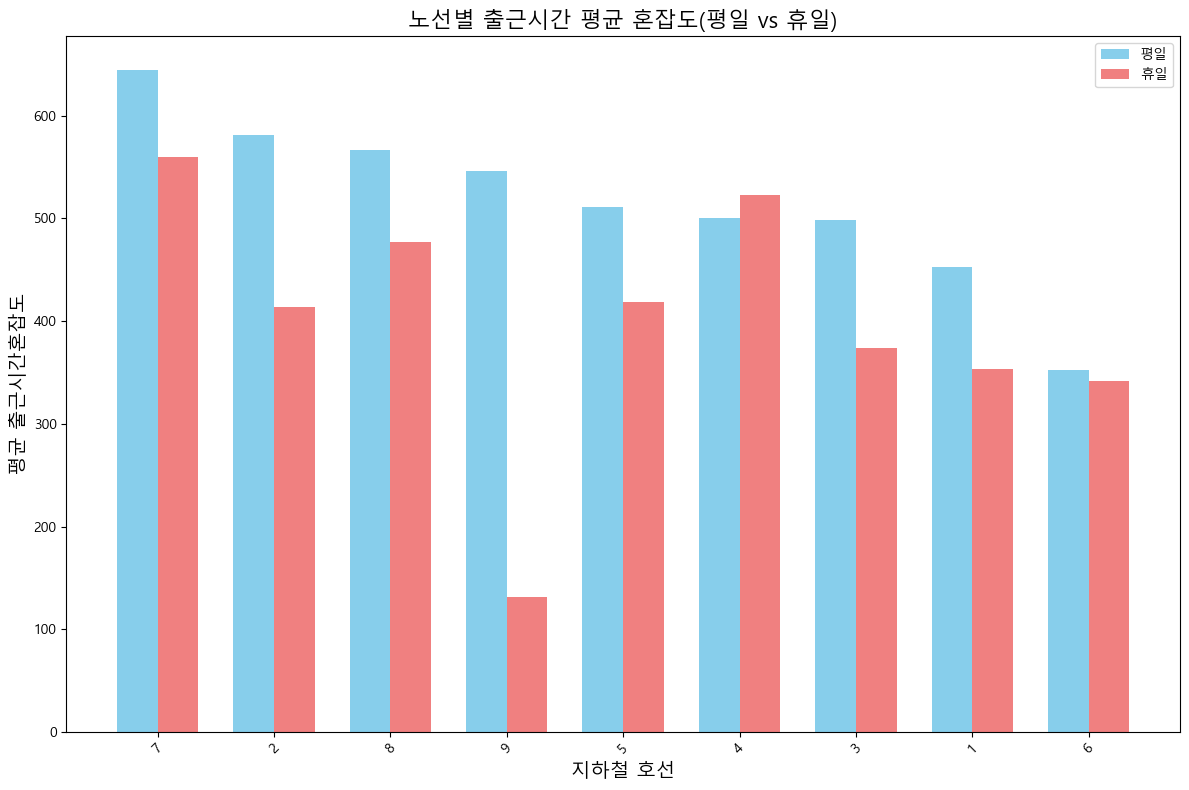

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(congestion_comparison))

plt.bar(index, congestion_comparison['출근시간혼잡도_weekday'], bar_width, label='평일', color='skyblue')
plt.bar(index + bar_width, congestion_comparison['출근시간혼잡도_holiday'], bar_width, label='휴일', color='lightcoral')

plt.title('노선별 출근시간 평균 혼잡도(평일 vs 휴일)', fontsize=16)
plt.xlabel('지하철 호선', fontsize=14)
plt.ylabel('평균 출근시간혼잡도', fontsize=14)
plt.xticks(index + bar_width / 2, congestion_comparison['호선'], rotation=45) 
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
line_9_data = subway_1[subway_1['호선'] == 9]
line_9_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
562,9,평일 급행,가양,813.378,696.208,37.561391,126.854456
563,9,평일 일반,가양,398.314,341.912,37.561391,126.854456
564,9,휴일 급행,가양,233.120,362.450,37.561391,126.854456
565,9,휴일 일반,가양,77.660,148.295,37.561391,126.854456
566,9,평일 일반,개화,0.000,0.000,37.578608,126.798153
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [66]:
line_9_general = line_9_data[line_9_data['요일구분'].str.contains('일반', na=False)]
line_9_express = line_9_data[line_9_data['요일구분'].str.contains('급행', na=False)]

In [67]:
general_avg_congestion = line_9_general['출근시간혼잡도'].mean()
express_avg_congestion = line_9_express['출근시간혼잡도'].mean()

print("일반 평균 혼잡도:", general_avg_congestion)
print("급행 평균 혼잡도:", express_avg_congestion)

일반 평균 혼잡도: 276.13417105263153
급행 평균 혼잡도: 488.600375


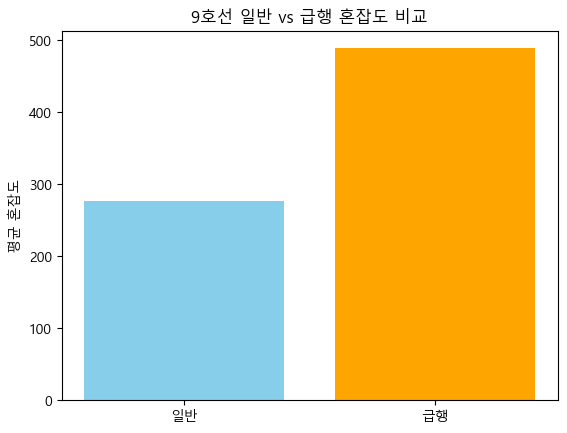

In [68]:
import matplotlib.pyplot as plt

# 데이터 준비
congestion_data = {
    '일반': general_avg_congestion,
    '급행': express_avg_congestion
}

# 시각화
plt.bar(congestion_data.keys(), congestion_data.values(), color=['skyblue', 'orange'])
plt.title('9호선 일반 vs 급행 혼잡도 비교')
plt.ylabel('평균 혼잡도')
plt.show()

In [69]:
line_9_data['출근시간'] = line_9_data['요일구분'].apply(lambda x: '평일' if '평일' in str(x) else '휴일')
line_9_data['열차종류'] = line_9_data['요일구분'].apply(lambda x: '일반' if '일반' in str(x) else '급행')

혼잡도_평균 = line_9_data.groupby(['출근시간', '열차종류'])['출근시간혼잡도'].mean().reset_index()

print(혼잡도_평균)

  출근시간 열차종류     출근시간혼잡도
0   평일   급행  770.806375
1   평일   일반  451.829000
2   휴일   급행  206.394375
3   휴일   일반  100.439342


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16156\1317377732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_9_data['출근시간'] = line_9_data['요일구분'].apply(lambda x: '평일' if '평일' in str(x) else '휴일')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16156\1317377732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_9_data['열차종류'] = line_9_data['요일구분'].apply(lambda x: '일반' if '일반' in str(x) else '급행')


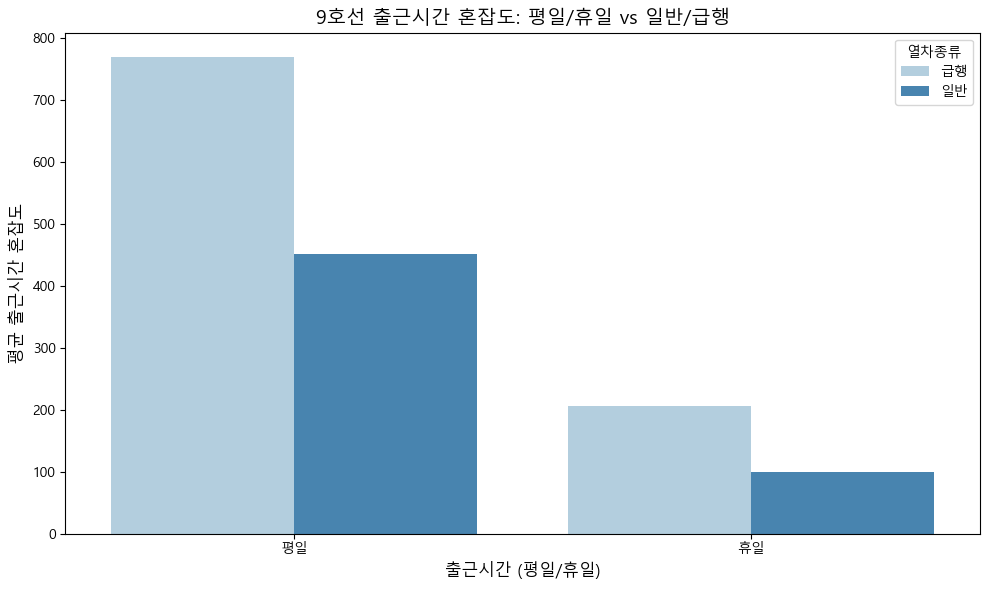

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='출근시간', y='출근시간혼잡도', hue='열차종류', data=혼잡도_평균, palette='Blues')

plt.title('9호선 출근시간 혼잡도: 평일/휴일 vs 일반/급행', fontsize=14)
plt.xlabel('출근시간 (평일/휴일)', fontsize=12)
plt.ylabel('평균 출근시간 혼잡도', fontsize=12)

plt.tight_layout()
plt.show()

In [71]:
weekday_data = subway_1[subway_1['요일구분'].str.contains('평일', na=False)]
weekday_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
6,1,평일,종로3가,487.800,527.400,37.570429,126.992095
8,1,평일,종로5가,475.600,540.200,37.570971,127.001900
...,...,...,...,...,...,...,...
660,9,평일 급행,중앙보훈병원,136.452,36.742,127.148376,37.528321
661,9,평일 일반,중앙보훈병원,20.256,12.746,127.148376,37.528321
664,9,평일 일반,증미,478.248,447.216,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311


In [72]:
import folium
from folium.plugins import HeatMap

map_center = [37.5665, 126.9780]

weekday_map = folium.Map(location=map_center, zoom_start=12)

heat_data_weekday = [[row['위도'], row['경도'], row['출근시간혼잡도']] for index, row in weekday_data.iterrows()]
HeatMap(heat_data_weekday).add_to(weekday_map)

holiday_map = folium.Map(location=map_center, zoom_start=12)

heat_data_holiday = [[row['위도'], row['경도'], row['출근시간혼잡도']] for index, row in holiday_data.iterrows()]
HeatMap(heat_data_holiday).add_to(holiday_map)

weekday_map.save('weekday_congestion_map.html')
holiday_map.save('holiday_congestion_map.html')

import webbrowser

webbrowser.open("weekday_congestion_map.html")
webbrowser.open("holiday_congestion_map.html")

True

In [73]:
subway_1

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [74]:
def 호선_구분_9(row):
    if row['호선'] == 9:
        if '일반' in str(row['요일구분']):
            return '9호선일반'
        elif '급행' in str(row['요일구분']):
            return '9호선급행'
    return row['호선']

subway_2 = subway_1.copy()
subway_2['호선'] = subway_2.apply(호선_구분_9, axis=1)
subway_2

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9호선일반,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9호선일반,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9호선일반,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9호선일반,평일 일반,흑석,723.760,880.276,37.508770,126.963708


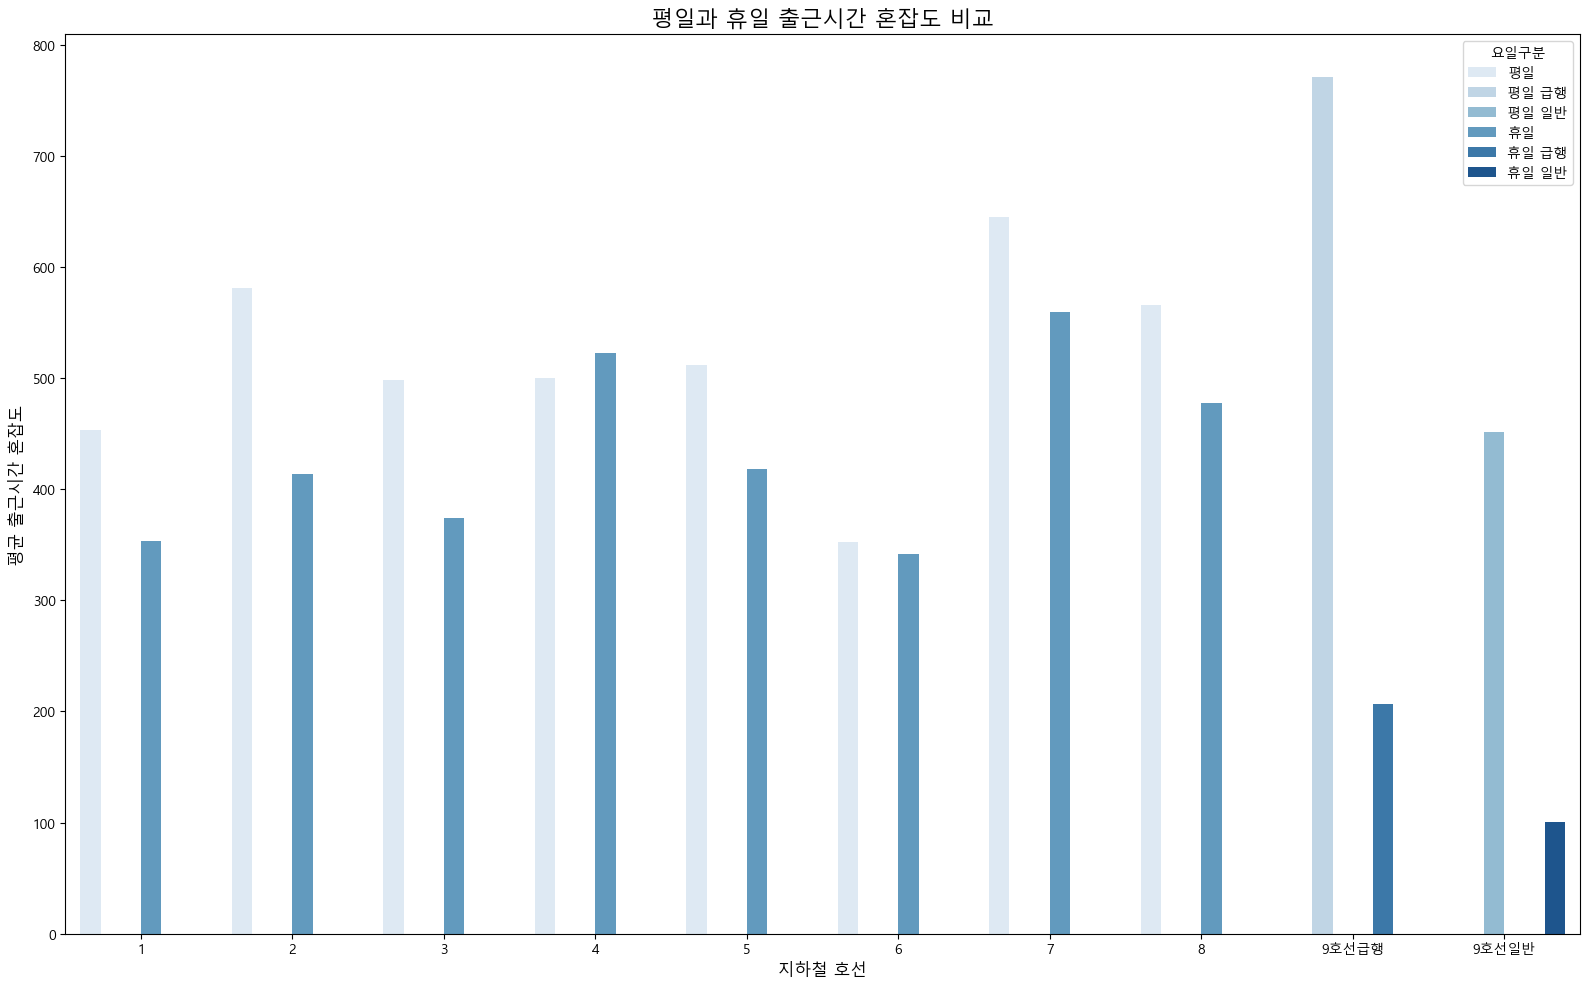

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

혼잡도_평균 = subway_2.groupby(['요일구분', '호선'])['출근시간혼잡도'].mean().reset_index()

plt.figure(figsize=(16, 10))
sns.barplot(x='호선', y='출근시간혼잡도', hue='요일구분', data=혼잡도_평균, palette='Blues', errorbar=None)
plt.title('평일과 휴일 출근시간 혼잡도 비교', fontsize=16)
plt.xlabel('지하철 호선', fontsize=12)
plt.ylabel('평균 출근시간 혼잡도', fontsize=12)
plt.tight_layout()
plt.show()

In [76]:
subway_info = pd.read_csv('../코드 작업/서울교통공사 역주소 및 전화번호_20241104.csv', encoding='euc-kr')
subway_info

,호선,역명,도로명주소,지번주소
0,1,서울,서울특별시 중구 세종대로 지하2(남대문로 5가),서울특별시 중구 남대문로5가 73-6 서울역(1호선)
1,1,시청,서울특별시 중구 세종대로 지하101(정동),서울특별시 중구 정동 5-5 시청역(1호선)
2,1,종각,서울특별시 종로구 종로 지하55(종로1가),서울특별시 종로구 종로1가 54 종각역(1호선)
3,1,종로3가,서울특별시 종로구 종로 지하129(종로3가),서울특별시 종로구 종로3가 10-5 종로3가역(1호선)
4,1,종로5가,서울특별시 종로구 종로 지하216(종로5가),서울특별시 종로구 종로5가 82-1 종로5가역(1호선)
...,...,...,...,...
269,9,송파나루,서울특별시 송파구 백제고분로 지하446(방이동),서울특별시 송파구 방이동 2 송파나루역(9호선)
270,9,한성백제,서울특별시 송파구 위례성대로 지하29(방이동),서울특별시 송파구 방이동 88-17 한성백제역(9호선)
271,9,올림픽공원,서울특별시 송파구 양재대로 지하1233(방이동),서울특별시 송파구 방이동 89-28 올림픽공원역(9호선)
272,9,둔촌오륜,서울특별시 강동구 강동대로 지하303(둔촌동),서울특별시 강동구 둔촌동 227-7 둔촌오륜역(9호선)


In [77]:
subway_1 = pd.read_csv('subway_1.csv', encoding='utf-8')  # 구글 드라이브에 공유
subway_1

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도
0,1,평일,서울,523.400,601.100,37.553150,126.972533
1,1,휴일,서울,358.100,751.700,37.553150,126.972533
2,1,평일,시청,444.400,604.800,37.563590,126.975407
3,1,휴일,시청,340.700,723.700,37.563590,126.975407
4,1,평일,종각,393.400,579.700,37.570203,126.983116
...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708


In [78]:
import pandas as pd
import re

def extract_district(address):
    match = re.search(r'서울특별시 (\S+)', address)
    if match:
        return match.group(1)  
    return None  

subway_info['자치구'] = subway_info['도로명주소'].apply(extract_district)
subway_info.pop('도로명주소')
subway_info.pop('지번주소')
subway_info

,호선,역명,자치구
0,1,서울,중구
1,1,시청,중구
2,1,종각,종로구
3,1,종로3가,종로구
4,1,종로5가,종로구
...,...,...,...
269,9,송파나루,송파구
270,9,한성백제,송파구
271,9,올림픽공원,송파구
272,9,둔촌오륜,강동구


In [79]:
merged_data = pd.merge(subway_1, subway_info[['호선', '역명', '자치구']], on=['호선', '역명'], how='left')
merged_data.to_csv('merged_data.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,NaN
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,NaN


In [80]:
merged_data.isna().sum()

호선           0
요일구분         0
역명           0
출근시간혼잡도      0
퇴근시간혼잡도      0
위도           0
경도           0
자치구        108
dtype: int64

In [81]:
nan_rows = merged_data[merged_data['자치구'].isna()]
nan_rows.head(60)

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
126,2,평일,까치산,239.100,136.300,37.531810,126.846706,NaN
127,2,휴일,까치산,116.600,113.800,37.531810,126.846706,NaN
128,3,평일,지축,638.300,613.800,37.648281,126.912551,NaN
129,3,휴일,지축,501.000,811.300,37.648281,126.912551,NaN
210,4,평일,미아사거리,647.800,556.300,37.613276,127.030083,NaN
211,4,휴일,미아사거리,664.900,785.500,37.613276,127.030083,NaN
352,5,평일,미사,397.500,270.000,37.563290,127.192954,NaN
353,5,휴일,미사,347.200,396.100,37.563290,127.192954,NaN
354,5,평일,하남풍산,211.700,206.900,37.552201,127.203897,NaN
355,5,휴일,하남풍산,228.700,307.300,37.552201,127.203897,NaN


In [82]:
merged_data.iloc[126:128, -1] = '강서구'
merged_data.iloc[210:212, -1] = '강북구'
merged_data.iloc[352:354, -1] = '경기도'
merged_data.iloc[354:356, -1] = '경기도'
merged_data.iloc[356:358, -1] = '경기도'
merged_data.iloc[358:360, -1] = '경기도'
merged_data.iloc[442:444, -1] = '경기도'
merged_data.iloc[480:482, -1] = '광진구'
merged_data.iloc[496:498, -1] = '동작구'
merged_data.iloc[518:520, -1] = '경기도'
merged_data.iloc[520:522, -1] = '경기도'
merged_data.iloc[548:562, -1] = '경기도'
merged_data.iloc[128:130, -1] = '경기도'
merged_data.iloc[562:566, -1] = '강서구'
merged_data.iloc[566:568, -1] = '강서구'
merged_data.iloc[568:572, -1] = '서초구'
merged_data.iloc[572:574, -1] = '강서구'
merged_data.iloc[574:576, -1] = '서초구'
merged_data.iloc[576:578, -1] = '영등포구'

In [83]:
merged_data.iloc[578:582, -1] = '강서구'
merged_data.iloc[582:584, -1] = '동작구'
merged_data.iloc[584:588, -1] = '동작구'
merged_data.iloc[588:592, -1] = '영등포구'
merged_data.iloc[592:596, -1] = '동작구'
merged_data.iloc[598:600, -1] = '양천구'
merged_data.iloc[600:604, -1] = '강서구'
merged_data.iloc[608:610, -1] = '서초구'
merged_data.iloc[614:616, -1] = '영등포구'
merged_data.iloc[622:624, -1] = '영등포구'
merged_data.iloc[630:634, -1] = '강남구'
merged_data.iloc[634:636, -1] = '양천구'
merged_data.iloc[636:638, -1] = '서초구'
merged_data.iloc[638:640, -1] = '강서구'
merged_data.iloc[640:642, -1] = '강서구'
merged_data.iloc[644:648, -1] = '영등포구'
merged_data.iloc[648:652, -1] = '강서구'
merged_data.iloc[664:666, -1] = '강서구'
merged_data.iloc[668:670, -1] = '동작구'

merged_data.to_csv('merged_data.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,강서구
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,동작구


In [84]:
# '자치구'에 '경기도'가 포함된 행 삭제
merged_data = merged_data[~merged_data['자치구'].str.contains('경기도', na=False)]

merged_data.to_csv('merged_data.csv', index=False)

merged_data

,호선,요일구분,역명,출근시간혼잡도,퇴근시간혼잡도,위도,경도,자치구
0,1,평일,서울,523.400,601.100,37.553150,126.972533,중구
1,1,휴일,서울,358.100,751.700,37.553150,126.972533,중구
2,1,평일,시청,444.400,604.800,37.563590,126.975407,중구
3,1,휴일,시청,340.700,723.700,37.563590,126.975407,중구
4,1,평일,종각,393.400,579.700,37.570203,126.983116,종로구
...,...,...,...,...,...,...,...,...
665,9,휴일 일반,증미,99.680,162.490,37.557402,126.861939,강서구
666,9,평일 일반,한성백제,112.316,91.854,127.116168,37.516311,송파구
667,9,휴일 일반,한성백제,32.050,75.765,127.116168,37.516311,송파구
668,9,평일 일반,흑석,723.760,880.276,37.508770,126.963708,동작구


In [85]:
weekday_data = merged_data[merged_data['요일구분'].str.contains('평일', na=False)]
weekend_data = merged_data[merged_data['요일구분'].str.contains('휴일', na=False)]

In [86]:
# 평일 데이터 그룹화
weekday_grouped = weekday_data.groupby('자치구')['출근시간혼잡도'].mean().reset_index()
weekday_grouped = weekday_grouped.rename(columns={'출근시간혼잡도': '평일_혼잡도'})
weekday_sorted = weekday_grouped.sort_values(by='평일_혼잡도', ascending=False)

weekday_sorted

,자치구,평일_혼잡도
4,관악구,797.950000
11,동작구,750.971000
5,광진구,732.645455
19,영등포구,711.075333
14,서초구,688.068706
13,서대문구,647.780000
7,금천구,645.700000
18,양천구,624.600571
6,구로구,613.475000
2,강북구,603.633333


In [87]:
weekend_grouped = weekend_data.groupby('자치구')['출근시간혼잡도'].mean().reset_index()
weekend_grouped = weekend_grouped.rename(columns={'출근시간혼잡도': '휴일_혼잡도'})
weekend_sorted = weekend_grouped.sort_values(by='휴일_혼잡도', ascending=False)

weekend_sorted

,자치구,휴일_혼잡도
4,관악구,658.275000
5,광진구,631.045455
2,강북구,626.600000
24,중랑구,577.487500
7,금천구,529.800000
16,성북구,521.633333
22,종로구,475.846667
1,강동구,475.621875
13,서대문구,473.580000
6,구로구,448.487500


#### Issues & Challenges
-
-
-

#### Reflection
-
-
-